<br>

# The universal workflow of machine learning - MNIST Handwritten Digit Dataset
<br>


<br>

## 1. Defining the problem and assembling a dataset

Q1: What will your input data be?

MNIST handwritten digit dataset consists of 70,000 small gray-scale images. A training set of 60000 examples, and a test set of 10000 examples of handwritten digits.These handwritten digits are between 0 and 9. Each digit is stored in a grayscale image with a size of 28 x 28 pixels.
<br>
<br>

Q2: What are you trying to predict? 

For the MNIST dataset, I'm trying to predict what digit does the number represents between 0 and 9. Basically, I wanted to classify the handwritten digit of the MNIST dataset such as classifying the grayscale images of handwritten digits into their 10 categories which is single digits between 0 and 9.
<br>
<br>

Q3. Is the data (samples and labels) available?

MNIST handwritten digit dataset can be loaded and downloaded from Keras which is an open-source python library for neural network.

Q4: What is the type of problem?

The type of problem is multiclass classification problem. For the MNIST dataset, we will have a set of input data and a set of labels, we are supposed to map each data with a label. The problem is to classify each grescale images into the correct category.
<br>
<br>

I will be using Keras to create a deep learning model later.<br>
Now, I'm going to Load and download MNIST handwritten digit dataset from Keras:

In [1]:
# download MNIST 

from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# print how much data we have
# for the training data, we have 60,000 images 28 x 28 pixels, 60,000 labels
# for the testing data, we have 10,000 images 28 x 28 pixels, 10,000 labels

# train data
print(train_images.shape, train_labels.shape)

# test data
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<br>
Now, lets visualize some examples:

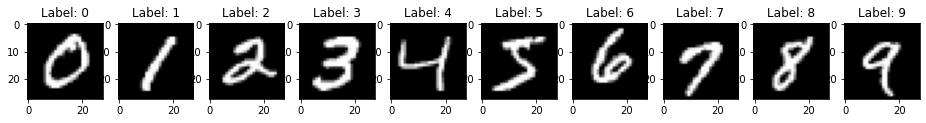

In [3]:
import matplotlib.pyplot as plt

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(16,16))

for i in range(0, num_classes):
    sample = train_images[train_labels == i][0]
    # show image, grayscale image
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title("Label: {}".format(i), fontsize=12)

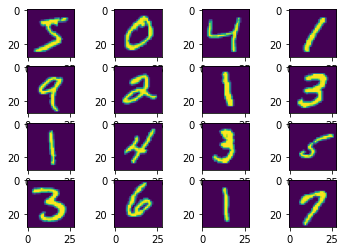

In [4]:
# showing some train images

import matplotlib.pyplot as plt

grid_size = 4
f, axarr = plt.subplots(grid_size, grid_size)
for i in range(grid_size):
    for j in range(grid_size):
        axarr[i, j].imshow(train_images[i * grid_size + j])

<br>


## 2. Choosing a measure of success

Q1: To achieve success, you must define what you mean by success—accuracy? Precision and recall? Customer-retention rate? Your metric for success will guide the choice of a loss function: what your model will optimize.

I would choose accuracy as a measure of success. My metric for success is accuracy. I'm aiming to achieve an accuracy of at least 91% on MNIST digits data. Accuracy metric can be used for multi-class classification like MNIST

<br>

## 3. Deciding on an evaluation protocol

Approach for validation:<br> 
Maintaining a hold-out validation set

I will choose hold out validation because it is the best, and there is plenty of data as MNIST dataset consists of 70,000 small gray-scale images. 

<br>

## 4. Preprocess and Preparing your data

Approach for splitting training samples, validation samples and testing samples:

45000 samples are for training purpose<br>
15000 samples are for validation purpose<br>
10000 samples are for testing purpose<br>
    

Correct way of normalizing and scaling the MNIST dataset:

This is a dataset of 60000 28x28 pixels grayscale images of the 10 digits, along with a test set of 10000 images. Tthe MNIST dataset has images with pixel values in the range [0, 255], so it is good to scale the data to the [0,1] range.

MNIST dataset randomized:

MNIST dataset alrealdy generate different looking numbers which means the data is already randomized.

In [5]:
# splitting the data
# the data is already randomized

from tensorflow.keras.utils import to_categorical

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


split_train_images = train_images[:45000]
split_train_labels = train_labels[:45000]

validation_images = train_images[45000:]
validation_labels = train_labels[45000:]

split_train_labels = to_categorical(split_train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

<br>

## 5. Developing a model that does better than a baseline

In order to achieve statistical power, we have to achieve an accuracy greater than 0.1 for MNIST handwritten digit classification.

Three key choices to build your first working model:

Choice of Last-layer activation:  softmax <br>
Choice of loss function: categorical_crossentropy <br>
Choice of optimization configuration: rmsprop<br>

In [6]:
#create model
# build

# basically, sequential model in keras is a model where we can keep adding layer after layer.
# sequential model allows us to create a deep neural network in Keras

from tensorflow.keras import models, layers

network = models.Sequential()


In [7]:
# build and adding two Dense layer

# first layer
# activation I going to use is relu, shape of the input is the image size 28*28
# activation is basically a function you add after layer to be able to solve non linear equation
# units is going to be 16

from keras.layers import Dense
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28, )))


In [8]:
# build and adding two Dense layer

# second layer
# the last layer activation will use softmax because it is for categorical_crossentropy loss function
# It going to output to 10 different neurons because we have 10 different digits
# activation is soft max which basically assigns a probability for each class to be correct

network.add(layers.Dense(10, activation='softmax'))



In [9]:
# choose rmsprop as the optimizer, rmsprop optimiser comes with default learning rate 
# choose categorical_crossentropy as the loss function to deal with multiple classes
# choose accuracy as the metrics

network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

# print out summary of the model
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                12560     
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras import models, layers
from keras.layers import Dense

network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(28 * 28, )))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [11]:
# train
# train for 10 epochs
history = network.fit(
    split_train_images, 
    split_train_labels, 
    epochs=10, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

Epoch 1/10
352/352 [==============================] - 4s 7ms/step - loss: 0.6795 - accuracy: 0.8149 - val_loss: 0.3465 - val_accuracy: 0.9012
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 0.3211 - accuracy: 0.9090 - val_loss: 0.3014 - val_accuracy: 0.9115
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 0.2831 - accuracy: 0.9191 - val_loss: 0.2705 - val_accuracy: 0.9225
Epoch 4/10
352/352 [==============================] - 2s 6ms/step - loss: 0.2635 - accuracy: 0.9243 - val_loss: 0.2583 - val_accuracy: 0.9271
Epoch 5/10
352/352 [==============================] - 2s 6ms/step - loss: 0.2486 - accuracy: 0.9288 - val_loss: 0.2488 - val_accuracy: 0.9291
Epoch 6/10
352/352 [==============================] - 2s 6ms/step - loss: 0.2365 - accuracy: 0.9322 - val_loss: 0.2354 - val_accuracy: 0.9340
Epoch 7/10
352/352 [==============================] - 2s 6ms/step - loss: 0.2262 - accuracy: 0.9359 - val_loss: 0.2315 - val_accuracy: 0.9357
Epoch 

In [12]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2138 - accuracy: 0.9417
Test loss: 0.21380312740802765
Test accuracy: 0.9416999816894531


### Result:
For the first model above, the test loss is 0.2138 and the test accuracy is 0.0.9417.

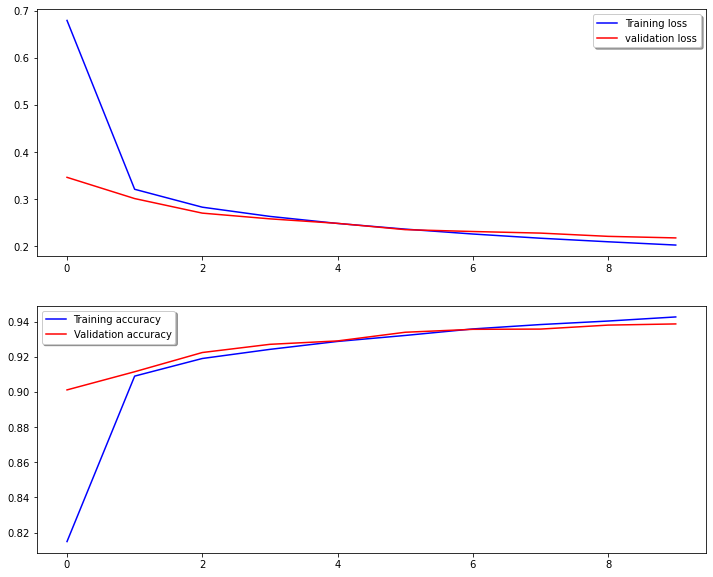

In [13]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



### Evaluate the model

Monitor the training loss & validation loss and the training accuracy and the validation accuracy:

As you can see from the graph above, the training loss decreases and the training accuracy increases. The validation loss decreases and the validation accuracy increases. 

With this model, we can achieve training accuracy and validation accuracy of more than 92%.

<br>

## 6. Scaling up: developing a model that overfits

Develop a model that overfits by:

1. Add layers.
2. Make the layers bigger.
3. Train for more epochs.

In [14]:
# build

from tensorflow.keras import models, layers
from keras.layers import Dense

# using sequential model to create a chain of layers, adding layer after layer
overfit_model = models.Sequential()
# adding more layers to design an overfitting neural network, an overfit model
# making the layers bigger, units is going to be 512
overfit_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
overfit_model.add(layers.Dense(512, activation='relu'))
overfit_model.add(layers.Dense(512, activation='relu'))
overfit_model.add(layers.Dense(512, activation='relu'))
overfit_model.add(layers.Dense(10, activation='softmax'))

overfit_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
# train
# now, i'm going to train for more epochs, a total of 40 epochs
history2 = overfit_model.fit(
    split_train_images, 
    split_train_labels, 
    epochs=40, 
    batch_size=128, 
    validation_data=(validation_images, validation_labels))

Epoch 1/40
352/352 [==============================] - 16s 40ms/step - loss: 0.3032 - accuracy: 0.9067 - val_loss: 0.1857 - val_accuracy: 0.9449
Epoch 2/40
352/352 [==============================] - 14s 39ms/step - loss: 0.1120 - accuracy: 0.9673 - val_loss: 0.1388 - val_accuracy: 0.9619
Epoch 3/40
352/352 [==============================] - 13s 38ms/step - loss: 0.0780 - accuracy: 0.9783 - val_loss: 0.1573 - val_accuracy: 0.9605
Epoch 4/40
352/352 [==============================] - 14s 39ms/step - loss: 0.0595 - accuracy: 0.9839 - val_loss: 0.1200 - val_accuracy: 0.9744
Epoch 5/40
352/352 [==============================] - 13s 38ms/step - loss: 0.0504 - accuracy: 0.9871 - val_loss: 0.1593 - val_accuracy: 0.9641
Epoch 6/40
352/352 [==============================] - 13s 38ms/step - loss: 0.0430 - accuracy: 0.9888 - val_loss: 0.1488 - val_accuracy: 0.9778
Epoch 7/40
352/352 [==============================] - 14s 39ms/step - loss: 0.0425 - accuracy: 0.9898 - val_loss: 0.2017 - val_accuracy:

In [16]:
test_loss, test_accuracy = overfit_model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.2743 - accuracy: 0.9800
Test loss: 0.27432096004486084
Test accuracy: 0.9800000190734863


### Result:

For the overfitting model, the test loss is 0.2743, and the test accuracy is 0.9800.

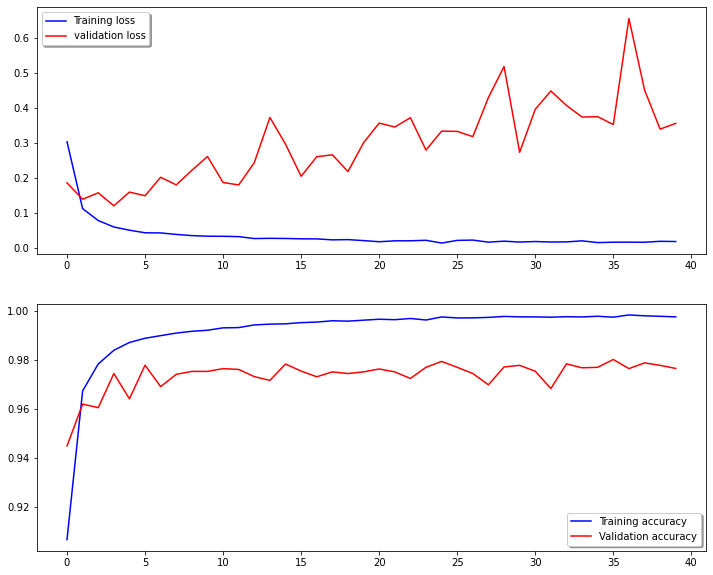

In [17]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(history2.history['loss'], color='b', label="Training loss")
ax[0].plot(history2.history['val_loss'], color='r', label="validation loss",axes =ax[0])

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history2.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history2.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


### Evaluate overfitting of the model on MNIST dataset

As you can see from the graph above,the training loss gets decreased while validation loss gets increased after a certain epoch. This is considered as overfitting of the model.

<br>

## 7. Regularizing your model and tuning your hyperparameters

Modify the model by experimenting with:

1. Add dropout
2. Try different architectures: add or remove layers
3. Add L1 and/or L2 regularization.

### Applying Dropout to the layer

In [18]:
from keras.layers import Dense, Dropout

network2 = models.Sequential()

# reducing the layers
network2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network2.add(layers.Dense(512, activation='relu',  input_shape=(28 * 28, )))

# adding dropout, 25% of the neurons are gonna be deactivated during the training which helps 
# to prevent overfitting from the network 
network2.add(Dropout(0.25))

network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = network2.fit(
    train_images, 
    to_categorical(train_labels), 
    epochs=10, 
    batch_size=128,
    validation_data=(validation_images, validation_labels))


Epoch 1/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2283 - accuracy: 0.9298 - val_loss: 0.0954 - val_accuracy: 0.9704
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0857 - accuracy: 0.9738 - val_loss: 0.0494 - val_accuracy: 0.9838
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0566 - accuracy: 0.9832 - val_loss: 0.0343 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0422 - accuracy: 0.9869 - val_loss: 0.0256 - val_accuracy: 0.9917
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0141 - val_accuracy: 0.9955
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0149 - val_accuracy: 0.9951
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0106 - val_accuracy: 0.9964

In [19]:
test_loss, test_accuracy = network2.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.1124 - accuracy: 0.9816
Test loss: 0.11240677535533905
Test accuracy: 0.9815999865531921


### Result:

After adding the Dropout layer to the model above, the test loss is 0.1124  and the test accuracy is 0.9816. I would say the result is the best so far with test loss of 0.1124.

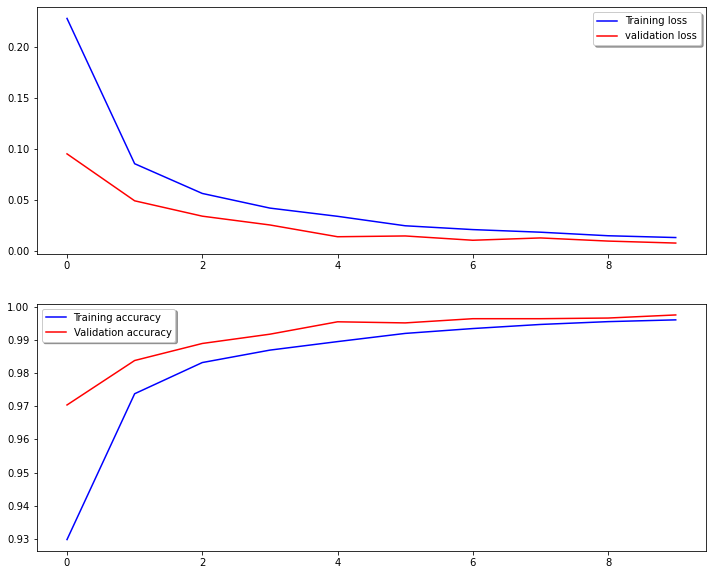

In [20]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(history3.history['loss'], color='b', label="Training loss")
ax[0].plot(history3.history['val_loss'], color='r', label="validation loss",axes =ax[0])

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history3.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history3.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Evaluate on the model that add Dropout to the layer:
As shown in the graph above, the training and validation accuracy is keep increasing, then the training and validation loss get decreased for each epochs.

<br>

### Applying L2 regularization to the layers

In [21]:
from keras import regularizers

network3 = models.Sequential()

# applying L2 regularization to regularize my model
# reduce the number of layers
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28 * 28, )))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = network3.fit(
    train_images, 
    to_categorical(train_labels), 
    epochs=10, 
    batch_size=128,
    validation_data=(validation_images, validation_labels))



Epoch 1/10
469/469 [==============================] - 10s 20ms/step - loss: 0.6386 - accuracy: 0.9222 - val_loss: 0.3140 - val_accuracy: 0.9598
Epoch 2/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2637 - accuracy: 0.9608 - val_loss: 0.2366 - val_accuracy: 0.9580
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.2038 - accuracy: 0.9680 - val_loss: 0.2455 - val_accuracy: 0.9476
Epoch 4/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1760 - accuracy: 0.9710 - val_loss: 0.1435 - val_accuracy: 0.9801
Epoch 5/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1599 - accuracy: 0.9733 - val_loss: 0.1543 - val_accuracy: 0.9740
Epoch 6/10
469/469 [==============================] - 9s 20ms/step - loss: 0.1492 - accuracy: 0.9757 - val_loss: 0.1248 - val_accuracy: 0.9838
Epoch 7/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1406 - accuracy: 0.9766 - val_loss: 0.1498 - val_accuracy: 0.971

In [22]:
test_loss, test_accuracy = network3.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.1496 - accuracy: 0.9720
Test loss: 0.14956358075141907
Test accuracy: 0.972000002861023


### Result:
After applying L2 regularisation, the test loss is 0.1496 , then the test accuracy is 0.9720.

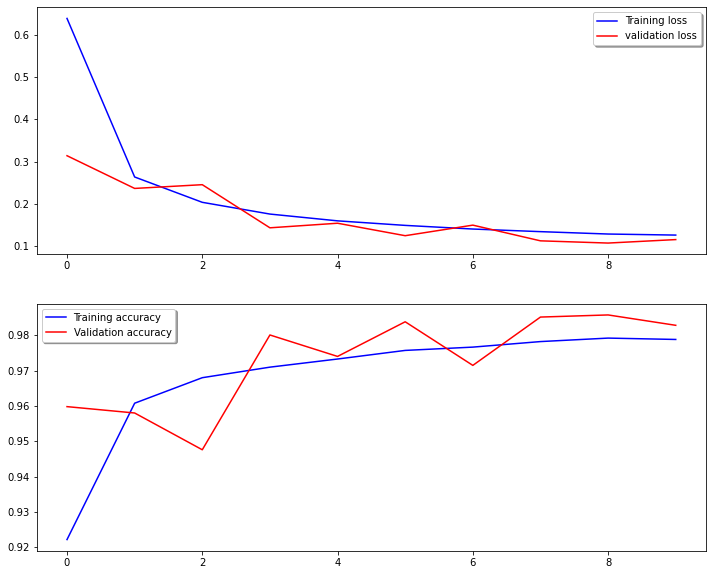

In [23]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(12, 10))
ax[0].plot(history4.history['loss'], color='b', label="Training loss")
ax[0].plot(history4.history['val_loss'], color='r', label="validation loss",axes =ax[0])

legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history4.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history4.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Evaluate on the model that add L2 regularization to the layer:
The training accuracy and validation accuracy improve, the accuracy incrases through each epochs. The training loss and validation loss also improve, the loss decreases through every epochs.